In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
print('TEST')
# https://colab.research.google.com/drive/12QusaaRj_lUwCGDvQNfICpa7kA7_a2dE#scrollTo=q2Jjv0yRKLPe


In [ ]:
!pip install minepy
!pip install mine

In [5]:
import os
features_col_name = ["iVecCoun",	
                     "dRadius",	
                     "dCohIndex",	
                     "vardRadius",	
                     "vardCohIndex",	
                     "d_varRad",	
                     "d_varCoh",	
                     "da5Radius_v0",	
                     "da5Radius_v1",	
                     "da5Radius_v2",	
                     "da5Radius_v3",	
                     "da5Radius_v4",	
                     "da5Radius_f0",	
                     "da5Radius_f1",	
                     "da5Radius_f2",	
                     "da5Radius_f3",	
                     "da5Radius_f4",	
                     "da5Radius_%0",	
                     "da5Radius_%1",	
                     "da5Radius_%2",	
                     "da5Radius_%3",	
                     "da5Radius_%4",	
                     "dCos",	
                     "dSin",	
                     "da5Degree_v0",	
                     "da5Degree_v1",	
                     "da5Degree_v2",	
                     "da5Degree_v3",	
                     "da5Degree_v4",	
                     "da5Degree_f0",	
                     "da5Degree_f1",	
                     "da5Degree_f2",	
                     "da5Degree_f3",	
                     "da5Degree_f4",	
                     "da5Degree_%0",	
                     "da5Degree_%1",	
                     "da5Degree_%2",	
                     "da5Degree_%3",	
                     "da5Degree_%4",	
                     "iRGBTotal",	
                     "iRMean",	
                     "iGMean",	
                     "iBMean",	
                     "d_luminance",	
                     "ia5R_v0",	
                     "ia5R_v1",	
                     "ia5R_v2",	
                     "ia5R_v3",	
                     "ia5R_v4",	
                     "ia5R_f0",	
                     "ia5R_f1",	
                     "ia5R_f2",	
                     "ia5R_f3",	
                     "ia5R_f4",	
                     "ia5R_%0",	
                     "ia5R_%1",	
                     "ia5R_%2",	
                     "ia5R_%3",	
                     "ia5R_%4",	
                     "ia5G_v0",	
                     "ia5G_v1",	
                     "ia5G_v2",	
                     "ia5G_v3",	
                     "ia5G_v4",	
                     "ia5G_f0",	
                     "ia5G_f1",	
                     "ia5G_f2",	
                     "ia5G_f3",	
                     "ia5G_f4",	
                     "ia5G_%0",	
                     "ia5G_%1",	
                     "ia5G_%2",	
                     "ia5G_%3",	
                     "ia5G_%4",	
                     "ia5B_v0",	
                     "ia5B_v1",	
                     "ia5B_v2",	
                     "ia5B_v3",
                     "ia5B_v4",	
                     "ia5B_f0",	
                     "ia5B_f1",	
                     "ia5B_f2",	
                     "ia5B_f3",	
                     "ia5B_f4",	
                     "ia5B_%0",	
                     "ia5B_%1",	
                     "ia5B_%2",	
                     "ia5B_%3",	
                     "ia5B_%4"]

In [6]:
def get_train_data(data):
    train_data = []
    train_label = []
    for k in data:
        for j in data[k]:
          train_data.append(j)
          train_label.append(int(k))
    return train_data, train_label

def get_test_data(data):
    test_data = []
    test_label = []
    for k in data:
        for j in data[k]:
          test_data.append(j)
          test_label.append(int(k))
    return test_data, test_label

def get_Data(dir_name="", remove=list()):
    data={}
    for index,name in enumerate(os.listdir(dir_name)):
        if ".csv" in name:
            with open(dir_name+"/"+name,'r') as f:
                d=f.readline().strip()
                d=f.readline().strip()
                while d:
                    line=d.split()
                    label=line[0]
                    if label not in data:
                        data[label]=[]
                    raw_data=line[1:]
                    raw_data=np.delete(raw_data, remove, axis=0)
                    one_data=[]
                    for i in raw_data:
                        # if not i.replace('.','').isdigit():
                            # i=0
                        one_data.append(float(i))
                    data[label].append(one_data)
                    d=f.readline().strip()
            f.close()
    return data

def count_accuracy(y,pred_y):
    correct = 0.
    for k in range(len(y)):
        if pred_y[k] == y[k]:
            correct += 1
    return correct/len(y)

In [7]:
# Import your necessary dependencies
# from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit


def get_score_features_random_forest_classifier(dir_name, remove):
  data = get_Data(dir_name, remove)
  test_data, test_label = get_test_data(data)
  fit_ranking = []
  # Feature extraction
  """
  Use the Recursive Feature Elimination algorithm in order to fit the data into the classification function 
  and know how many features I need to select so that its accuracy is high. 
  Use Stratified Cross Validation to enhance the accuracy.
  A model can be random forests.
  """
  model = RandomForestClassifier(n_estimators=100,random_state=True,n_jobs=-1)
  rfe = RFE(model)
  fit = rfe.fit(test_data, test_label)
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  # Mapping
  for i in range(len(features_col_name)):
    fit_ranking.append(fit.ranking_[i])
  return fit_ranking


def display_RFE(dir_name, remove):
  data = get_Data(dir_name, remove)
  test_data, test_label = get_test_data(data)
  cv = StratifiedKFold(2)
  visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')
  visualizer.fit(test_data, test_label)        # Fit the data to the visualizer
  visualizer.show()           # Finalize and render the figure
  return




In [8]:
# Code from Second MIC
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from minepy import MINE

def get_score_features(dir_name, remove, mic_threshold):
  good_features = []
  print("dir_name:", dir_name)
  tolal_features = 89 - len(remove)
  data = get_Data(dir_name, remove)
  print(data)
  print(data["0"])
  print(data["1"])
  d0=np.transpose(data["0"]) # transpose the matrix that each row stand for each feature
  d1=np.transpose(data["1"])
  print(data)
  mine = MINE(alpha=0.6, c=15)
  mic_matrix = np.zeros(tolal_features)
  print(mic_matrix)
  for i in range(tolal_features):
    c=list(d0[i])+list(d1[i])
    d=[0.]*len(d0[i])+[1.]*len(d1[i])
    mine.compute_score(c, d) # computer the mic between feature and label
    # mic_matrix[i] = mine.mic()
    # print(mine.mic())
    # print(mine.get_score())
    mic_matrix[i] = mine.mic()
    if mic_matrix[i] > mic_threshold and i not in remove:
      good_features.append(mic_matrix[i])
  print("good_features", good_features)
  print("len(good_features)", len(good_features))
  print("finish.")
  return good_features


In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

# All attributes
rf_ref = []
mic = []
path_datasets = "Datasets"
rf_ref = get_score_features_random_forest_classifier("/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, [])
mic = get_score_features("/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, [], 0.0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

# Get x values of the sine wave
plot.figure(figsize = (20, 8))

# data to be plotted
x = np.arange(0, len(mic))
y = mic

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(x, y, color='g')

# Give a title for the sine wave plot
plot.title('MIC')

# Give x axis label for the sine wave plot
plot.xlabel('Feature indexes')

# Give y axis label for the sine wave plot
plot.ylabel('MIC results')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()


plot.figure(figsize = (20, 8))
# data to be plotted
x = np.arange(0, len(rf_ref))
y = rf_ref

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(x, y, color='r')

# Give a title for the sine wave plot
plot.title('RF-RFE')

# Give x axis label for the sine wave plot
plot.xlabel('Feature indexes')

# Give y axis label for the sine wave plot
plot.ylabel('RF-RFE results')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

In [ ]:
# Decision
# creating a DataFrame
dict = {'Features_col_name' : features_col_name,
        'RFE' : rf_ref,
        'MIC' : mic,
}
df = pd.DataFrame(dict)
filtered_df = df
display(filtered_df)

In [ ]:
# motion_model_random_forest = train_random_forest_fire('Datasets', [])
# test_random_forest_fire(motion_model_random_forest, [])
def generate_remove_array(remove_list):
  all_features = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
    21, 22, 23, 24,	25,	26,	27,	28,	29,	30,
    31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
    41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
    51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
    61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
    71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88]
  for ele in remove_list:
    all_features.remove(ele)
  return all_features


selected_features_motion = []
selected_features_luminance = []
selected_features_colours_R = []
selected_features_colours_G = []
selected_features_colours_B = []

# Motion
motions_df = filtered_df[filtered_df.Features_col_name.isin([
  "iVecCoun", "dRadius", "dCohIndex", "vardRadius", "vardCohIndex", "dCos", "dSin"])]
display(motions_df)
print('selected features', motions_df.index)
selected_features_motion = motions_df.index.values

# Luminance
luminance_df = filtered_df[filtered_df.Features_col_name.isin(["d_luminance"])]
display(luminance_df)
print('selected features', luminance_df.index)
selected_features_luminance = luminance_df.index.values

# Colours_R
colours_R_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5R_v0", "ia5R_v1", "ia5R_v2", "ia5R_v3", "ia5R_v4",
            "ia5R_f0", "ia5R_f1", "ia5R_f2", "ia5R_f3", "ia5R_f4"
            ])]
display(colours_R_df)
print('selected features', colours_R_df.index)
selected_features_colours_R = colours_R_df.index.values

# Colours_G
colours_G_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5G_v0", "ia5G_v1", "ia5G_v2", "ia5G_v3", "ia5G_v4",
            "ia5G_f0", "ia5G_f1", "ia5G_f2", "ia5G_f3", "ia5G_f4",
            ])]
display(colours_G_df)
print('selected features', colours_G_df.index)
selected_features_colours_G = colours_G_df.index.values

# Colours_B
colours_B_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5B_v0", "ia5B_v1", "ia5B_v2", "ia5B_v3", "ia5B_v4",
            "ia5B_f0", "ia5B_f1", "ia5B_f2", "ia5B_f3", "ia5B_f4",
            ])]
display(colours_B_df)
print('selected features', colours_B_df.index)
selected_features_colours_B = colours_B_df.index.values

In [19]:
import os

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f
path_datasets = "Datasets_4_stages"
def train_random_forest_fire(remove):
    data_train = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, remove=remove)
    train_data, train_label = get_train_data(data_train)
    random_forest_model = RandomForestClassifier(
        n_jobs=-1, max_depth=11, 
        n_estimators=50, min_samples_leaf=1)
    # Split train and test
    random_forest_model.fit(train_data, train_label)
    return random_forest_model


def generate_remove_array(remove_list):
  all_features = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
    21, 22, 23, 24,	25,	26,	27,	28,	29,	30,
    31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
    41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
    51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
    61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
    71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88]
  for ele in remove_list:
    all_features.remove(ele)
  return all_features

# Use Remove to split up motion, luminance, and RGB
# Get attributes for motion by removing others attribute.
# Motion attributes 0,	1,	2,	3,	4, 22,	23

"""
remove_not_motion = [
                    5, 6,	7,	8,	9,	10,
          11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
          21, 24,	25,	26,	27,	28,	29,	30,
          31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
          41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
          51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
          61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
          71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
          81, 82, 83, 84, 85, 86, 87, 88]
"""

remove_not_motion = generate_remove_array(selected_features_motion)
print(remove_not_motion)
motion_model_random_forest = train_random_forest_fire(remove_not_motion)
print("Training done!")


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
Training done!


In [20]:
from tabulate import tabulate
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def is_fire(model, remove, name="", footage_name=''):
    # SB_Vt = "SB_19_Vt_0.1"
    # Comparison purple fire and smoke.
    # data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Dataset_test_fire_" + SB_Vt, remove=remove)
    # data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Dataset_test_not_fire_" + SB_Vt, remove=remove)
    data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Test_datasets/" + footage_name, remove=remove)
    test_data, test_label = get_test_data(data_test_fire)
    Y_prediction = model.predict(test_data)
    print(Y_prediction)
    # isFire = True if ((100 * np.count_nonzero(Y_prediction == 1) / len(Y_prediction)) > threshold) else False
    percentage_no_fire = (100 * np.count_nonzero(Y_prediction == 0) / len(Y_prediction))
    percentage_fire = (100 * np.count_nonzero(Y_prediction == 1) / len(Y_prediction))
    percentage_smoke = (100 * np.count_nonzero(Y_prediction == 2) / len(Y_prediction))
    percentage_fire_smoke = (100 * np.count_nonzero(Y_prediction == 3) / len(Y_prediction))
    
    df = pd.DataFrame({
       footage_name : [str(percentage_no_fire) + " %",
               str(percentage_fire) + " %",
               str(percentage_smoke) + " %",
               str(percentage_fire_smoke) + " %"
               ],
    })
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke;

def print_report(nameOfReport, motion_model, remove_not_motion):
  print(nameOfReport)
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage01-015")
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage01-010")
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage02-023")
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage02-006")
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage00-008")
  percentage_no_fire, percentage_fire, percentage_smoke, percentage_fire_smoke = is_fire(motion_model, remove_not_motion, "Motion", "footage00-001")
  print("")

In [21]:
motion = []
print_report("Random forest",
             motion_model_random_forest,
             remove_not_motion)

Random forest
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
+----+----------------------+
|    | footage01-015        |
|----+----------------------|
|  0 | 0.0 %                |
|  1 | 99.50248756218906 %  |
|  2 | 0.0 %                |
|  3 | 0.4975124378109453 % |
+----+----------------------+
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


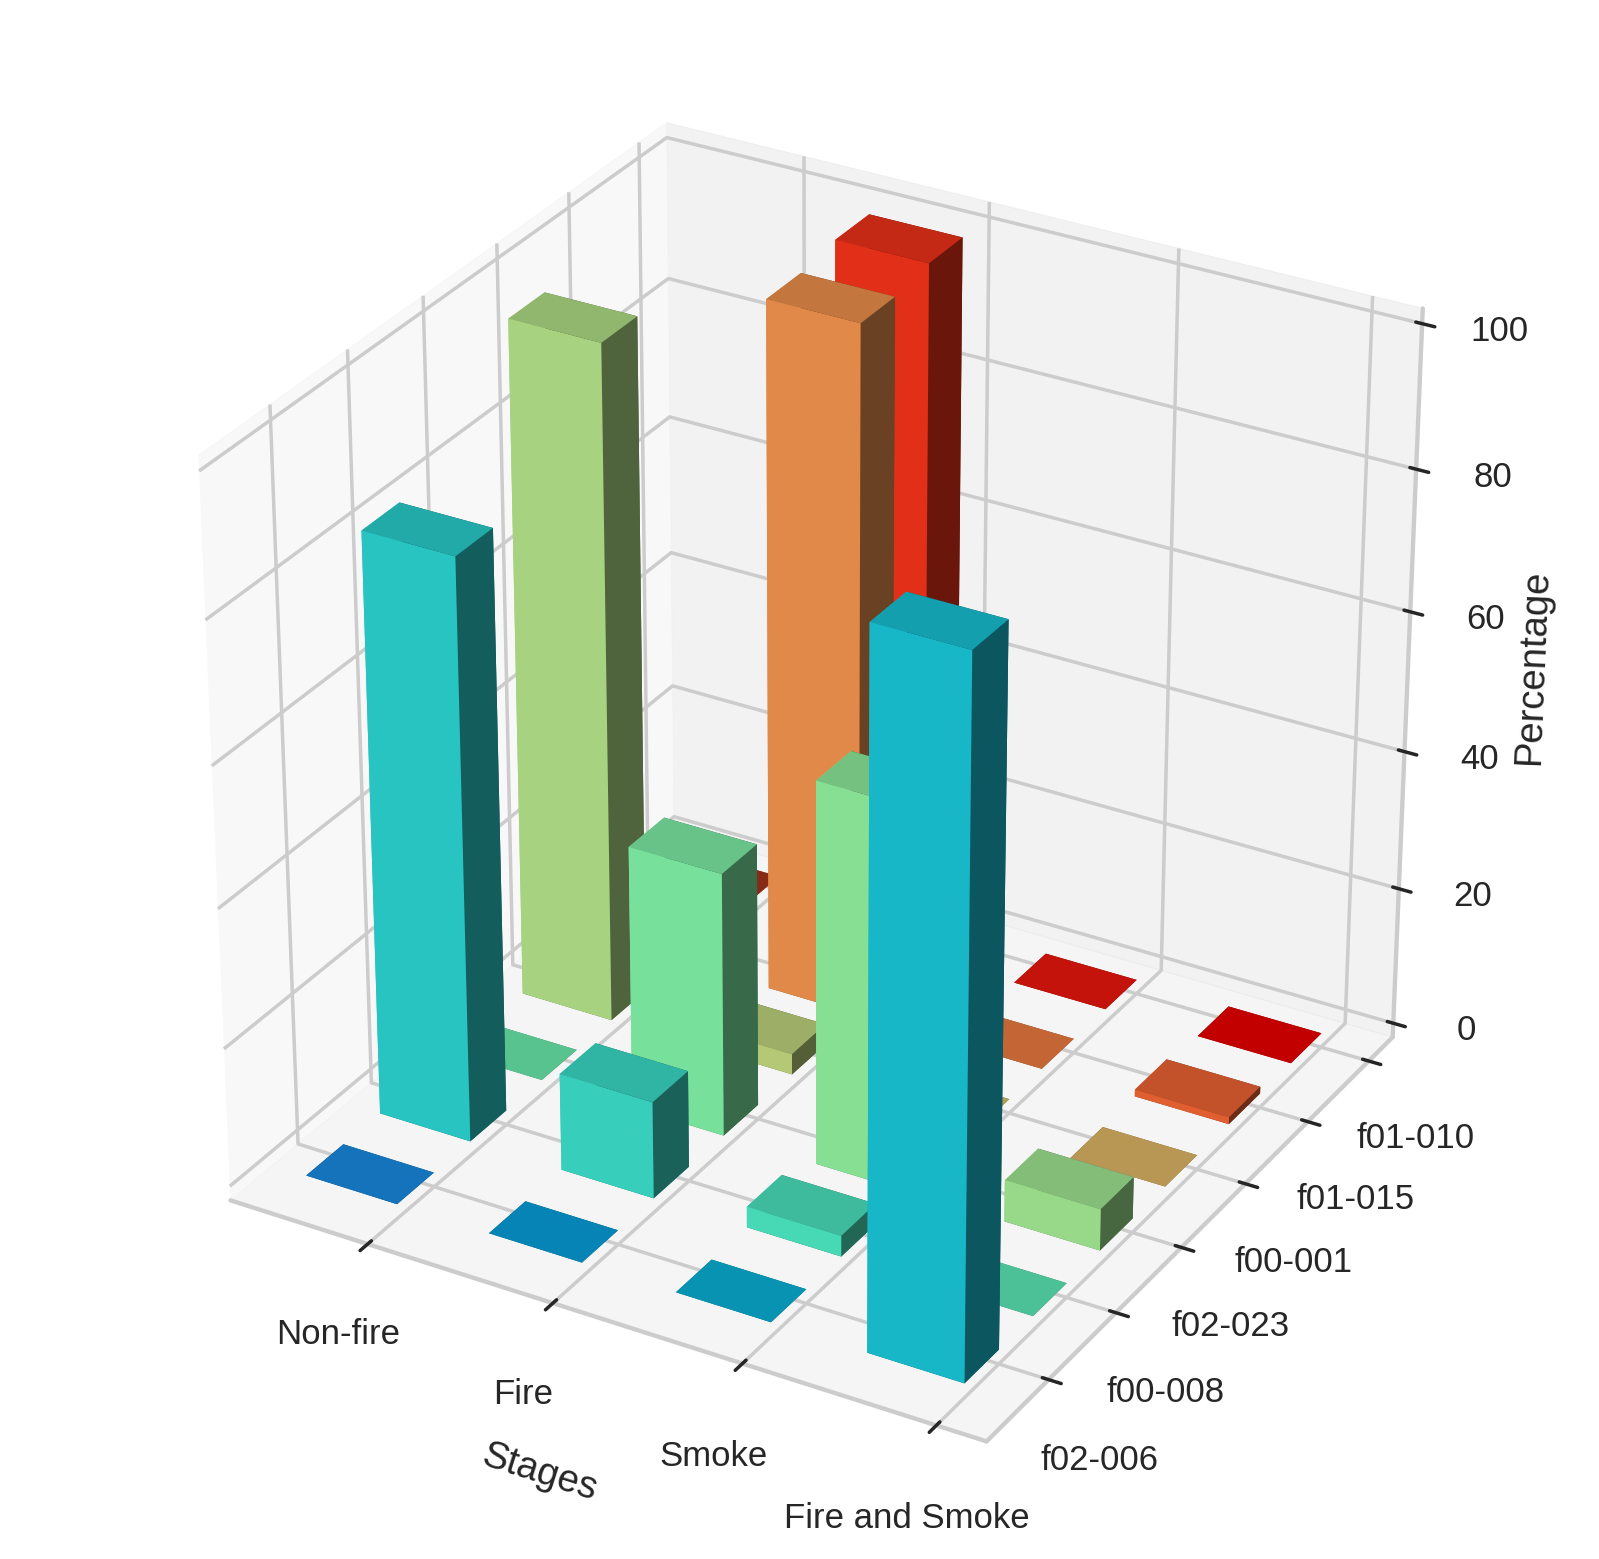

In [22]:
# Draw 3D graph
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result=[['0', '0', '0', '100'],
        ['83', '14', '3', '0'],
        ['0', '38', '55','6'],
        ['97', '3', '0', '0'],
        ['0', '99', '0', '1'],
        ['0', '100', '0', '0'],
        ]

result = np.array(result, dtype=np.int)
colors = ['r','b','g','y','b','p']
fig=plt.figure(figsize=(8, 8), dpi=250)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Stages', labelpad=10)
ax1.set_ylabel('', labelpad=10)
ax1.set_zlabel('Percentage')
xlabels = np.array(['Non-fire', 'Fire', 'Smoke','Fire and Smoke'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['f02-006', 'f00-008', 'f02-023', 'f00-001','f01-015','f01-010'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()